In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# Read the Mouse and Drug Data and the Clinical Trial Data
mousedata= pd.read_csv("data/mouse_drug_data.csv")
trialdata = pd.read_csv("data/clinicaltrial_data.csv")


mousedatadf = pd.DataFrame(mousedata)
trialdatadf = pd.DataFrame(trialdata)

# Combine the data into a single dataset

mousetrialmerged = pd.merge(trialdata,mousedata,on='Mouse ID',how='left')

# Display the data table for preview
mousetrialmerged.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
# Convert to DataFrame
# Preview DataFrame

groupeddrugtime = mousetrialmerged.groupby(["Drug","Timepoint"])
meangroupeddrugtimedf = pd.DataFrame(groupeddrugtime['Tumor Volume (mm3)'].mean())
meangroupeddrugtimedf.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
# Convert to DataFrame
#SEmeangroupeddrugtimedf
# Preview DataFrame

SEMgroupeddrugtimedf = pd.DataFrame(groupeddrugtime['Tumor Volume (mm3)'].sem())
SEMgroupeddrugtimedf.head()




Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [4]:
# Minor Data Munging to Re-Format the Data Frames
# Preview that Reformatting worked

In [5]:
meangroupeddrugtimedf2 = meangroupeddrugtimedf.pivot_table(values='Tumor Volume (mm3)',index='Timepoint',columns='Drug')
meangroupeddrugtimedf2.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [6]:
SEMgroupeddrugtimedf2 = SEMgroupeddrugtimedf.pivot_table(values='Tumor Volume (mm3)',index='Timepoint',columns='Drug')
SEMgroupeddrugtimedf2.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


In [7]:
x_axis = mousetrialmerged['Timepoint'].value_counts().index
x_axis

Int64Index([0, 5, 10, 15, 20, 25, 30, 35, 40, 45], dtype='int64')

In [8]:
y_axis = meangroupeddrugtimedf2['Capomulin']
y_axis2 = meangroupeddrugtimedf2['Infubinol']
y_axis3 = meangroupeddrugtimedf2['Ketapril']
y_axis4 = meangroupeddrugtimedf2['Placebo']
sem1 = SEMgroupeddrugtimedf2['Capomulin']
sem2 = SEMgroupeddrugtimedf2['Infubinol']
sem3 = SEMgroupeddrugtimedf2['Ketapril']
sem4 = SEMgroupeddrugtimedf2['Placebo']

<ErrorbarContainer object of 3 artists>

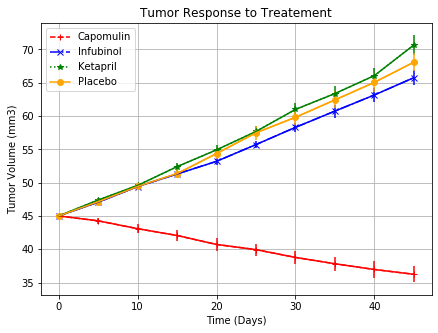

In [9]:
plt.figure(figsize=[7,5])
plt.plot(x_axis,y_axis,color="red",linestyle='--', label="Capomulin",marker='+')
plt.plot(x_axis,y_axis2,color="blue", linestyle='-.', label="Infubinol",marker='x')
plt.plot(x_axis,y_axis3,color="green", linestyle=':', label="Ketapril",marker='*')
plt.plot(x_axis,y_axis4,color="orange",linestyle='-',  label="Placebo",marker='o')
plt.grid()
plt.title("Tumor Response to Treatement")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.legend(loc="best")
plt.errorbar(x_axis, y_axis, sem1,color="red")
plt.errorbar(x_axis, y_axis2, sem2,color="blue")
plt.errorbar(x_axis, y_axis3, sem3,color="green")
plt.errorbar(x_axis, y_axis4, sem4,color="orange")

In [10]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [11]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
# Convert to DataFrame
# Preview DataFrame

meanMetastaticSitesdf = pd.DataFrame(groupeddrugtime['Metastatic Sites'].mean())
meanMetastaticSitesdf.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [12]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
# Convert to DataFrame
# Preview DataFrame

SEMMetastaticSitesdf = pd.DataFrame(groupeddrugtime['Metastatic Sites'].sem())
SEMMetastaticSitesdf.head()



Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [13]:
# Minor Data Munging to Re-Format the Data Frames
# Preview that Reformatting worked


meanMetastaticSitesdf2 = meanMetastaticSitesdf.pivot_table(values='Metastatic Sites',index='Timepoint',columns='Drug')
meanMetastaticSitesdf2.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [14]:
SEMMetastaticSitesdf2 = SEMMetastaticSitesdf.pivot_table(values='Metastatic Sites',index='Timepoint',columns='Drug')
SEMMetastaticSitesdf2.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


In [15]:
my_axis = meanMetastaticSitesdf2['Capomulin']
my_axis2 = meanMetastaticSitesdf2['Infubinol']
my_axis3 = meanMetastaticSitesdf2['Ketapril']
my_axis4 = meanMetastaticSitesdf2['Placebo']
msem1 = SEMMetastaticSitesdf2['Capomulin']
msem2 = SEMMetastaticSitesdf2['Infubinol']
msem3 = SEMMetastaticSitesdf2['Ketapril']
msem4 = SEMMetastaticSitesdf2['Placebo']

<ErrorbarContainer object of 3 artists>

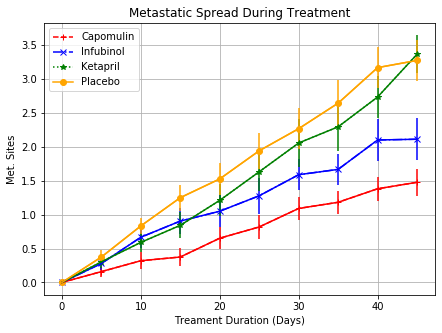

In [16]:
# Generate the Plot (with Error Bars)
# Save the Figure
# Show the Figure

plt.figure(figsize=[7,5])
plt.plot(x_axis,my_axis,color="red",linestyle='--', label="Capomulin",marker='+')
plt.plot(x_axis,my_axis2,color="blue", linestyle='-.', label="Infubinol",marker='x')
plt.plot(x_axis,my_axis3,color="green", linestyle=':', label="Ketapril",marker='*')
plt.plot(x_axis,my_axis4,color="orange",linestyle='-',  label="Placebo",marker='o')
plt.grid()
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treament Duration (Days)")
plt.ylabel("Met. Sites")
plt.legend(loc="best")
plt.errorbar(x_axis, my_axis, msem1,color="red")
plt.errorbar(x_axis, my_axis2, msem2,color="blue")
plt.errorbar(x_axis, my_axis3, msem3,color="green")
plt.errorbar(x_axis, my_axis4, msem4,color="orange")

## Survival Rates

In [17]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
# Convert to DataFrame
# Preview DataFrame

countmicedf = pd.DataFrame(groupeddrugtime['Mouse ID'].count())
countmicedf.rename(columns={"Mouse ID": "Mouse Count"})
countmicedf.head()

Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23

In [18]:
# Minor Data Munging to Re-Format the Data Frames
# Preview the Data Frame

countmicedf2 = countmicedf.pivot_table(values='Mouse ID',index='Timepoint',columns='Drug')
countmicedf2.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [34]:
count_axis = countmicedf2['Capomulin']
count_axis2 = countmicedf2['Infubinol']
count_axis3 = countmicedf2['Ketapril']
count_axis4 = countmicedf2['Placebo']

In [32]:
CapomulinSR = 
InfubinolSR = 100*(meangroupeddrugtimedf2['Infubinol'].loc[45]-meangroupeddrugtimedf2['Infubinol'].loc[0])/meangroupeddrugtimedf2['Infubinol'].loc[0]
KetaprilSR = 100*(meangroupeddrugtimedf2['Ketapril'].loc[45]-meangroupeddrugtimedf2['Ketapril'].loc[0])/meangroupeddrugtimedf2['Ketapril'].loc[0]
PlaceboSR = 100*(meangroupeddrugtimedf2['Placebo'].loc[45]-meangroupeddrugtimedf2['Placebo'].loc[0])/meangroupeddrugtimedf2['Placebo'].loc[0]

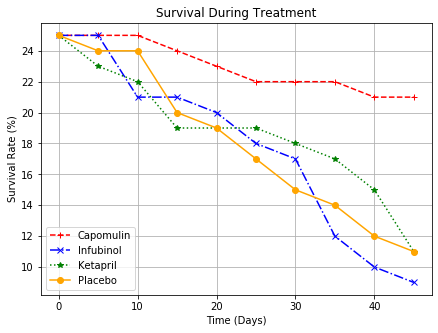

In [35]:
# Generate the Plot (Accounting for percentages)
# Save the Figure
# Show the Figure

plt.figure(figsize=[7,5])
plt.plot(x_axis,count_axis,color="red",linestyle='--', label="Capomulin",marker='+')
plt.plot(x_axis,count_axis2,color="blue", linestyle='-.', label="Infubinol",marker='x')
plt.plot(x_axis,count_axis3 ,color="green", linestyle=':', label="Ketapril",marker='*')
plt.plot(x_axis,count_axis4,color="orange",linestyle='-',  label="Placebo",marker='o')
plt.grid()
plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.legend(loc="best")

plt.show()

## Summary Bar Graph

In [168]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [19]:

#((groupeddrugtimedf['Capomulin'][45] - groupeddrugtimedf['Capomulin'][0])/groupeddrugtimedf['Capomulin'][0])*100

In [21]:
tumor_pct_change =  100 * (meangroupeddrugtimedf2.iloc[-1] - meangroupeddrugtimedf2.iloc[0]) / meangroupeddrugtimedf2.iloc[0]
tumor_pct_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

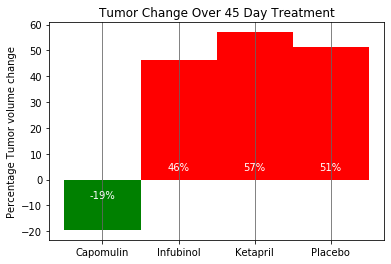

In [23]:
# Store all Relevant Percent Changes into a Tuple
Percent_change=(tumor_pct_change["Capomulin"],tumor_pct_change["Infubinol"],tumor_pct_change["Ketapril"],tumor_pct_change["Placebo"])
fig, ax=plt.subplots()


# Splice the data between passing and failing drugs
ticklocations= np.arange(len(Percent_change))
pa=ax.bar(a[0],Percent_change[0],width=1,color='green')
mi=ax.bar(a[1:],Percent_change[1:],width=1,color='red')

# Orient widths. Add labels, tick marks, etc. 
Drug=['Capomulin','Infubinol','Ketapril','Placebo']
plt.xticks(ticklocations,Drug)
plt.title("Tumor Change Over 45 Day Treatment")
plt.ylabel("Percentage Tumor volume change")
plt.grid(b=True, which='major', color='#666666', linestyle='-', axis="x")

# Use functions to label the percentages of changes
def label_failed (valueplus):
    for values in valueplus:
        height = values.get_height()
        ax.text(values.get_x() + values.get_width()/2., 3,
               '%d%%' % int(height),ha='center', va='bottom', color="white")
def label_passed (valueplus):
    for values in valueplus:
        height = values.get_height()
        ax.text(values.get_x() + values.get_width()/2., -8,
               '%d%%' % int(height),ha='center', va='bottom', color="white")

# Call functions to implement the function calls
label_failed(mi)
label_passed(pa)

# Save the Figure


# Show the Figure
fig.show()


# Observations

In [ ]:
1. Capomulin was the only out of the 4 analyzed that saw a decrease in tumour volume at the end of the study.
2. Capomulin had the highest survival rate.
3. Capomulin resulted in the least number of metastatized sites.